In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
file_path = './seattle-weather.csv'
data = pd.read_csv(file_path)

data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,1,2012


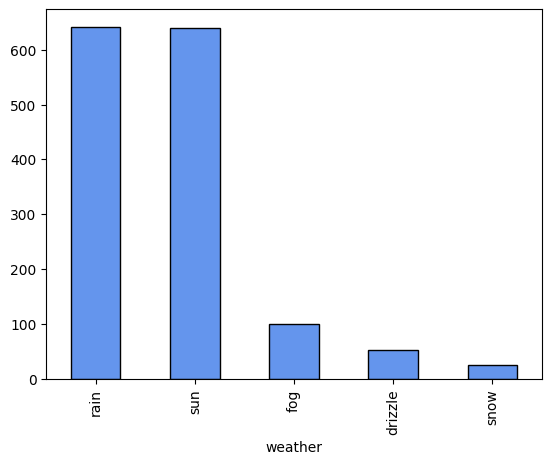

In [8]:
Weather_plot = data['weather'].value_counts().plot(kind='bar', color='cornflowerblue', edgecolor='black')

In [9]:
data.drop('date',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)
data.drop('year',axis=1,inplace=True)
data.head()

,precipitation,temp_max,temp_min,wind,weather,month
0,0.0,12.8,5.0,4.7,drizzle,1
1,10.9,10.6,2.8,4.5,rain,1
2,0.8,11.7,7.2,2.3,rain,1
3,20.3,12.2,5.6,4.7,rain,1
4,1.3,8.9,2.8,6.1,rain,1


In [10]:
data["temp_avg"] = (data["temp_max"] + data["temp_min"]) / 2

In [11]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()

data['weather_encoded'] = labels.fit_transform(data['weather'])
data.head()

,precipitation,temp_max,temp_min,wind,weather,month,temp_avg,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,1,8.90,0
1,10.9,10.6,2.8,4.5,rain,1,6.70,2
2,0.8,11.7,7.2,2.3,rain,1,9.45,2
3,20.3,12.2,5.6,4.7,rain,1,8.90,2
4,1.3,8.9,2.8,6.1,rain,1,5.85,2


In [12]:
mapping = dict(zip(labels.classes_, labels.transform(labels.classes_)))
print("Bảng ánh xạ:", mapping)

Bảng ánh xạ: {'drizzle': np.int64(0), 'fog': np.int64(1), 'rain': np.int64(2), 'snow': np.int64(3), 'sun': np.int64(4)}


In [13]:
data.drop(['weather', 'temp_max', 'temp_min'], axis=1, inplace=True)
data.head()

,precipitation,wind,month,temp_avg,weather_encoded
0,0.0,4.7,1,8.90,0
1,10.9,4.5,1,6.70,2
2,0.8,2.3,1,9.45,2
3,20.3,4.7,1,8.90,2
4,1.3,6.1,1,5.85,2


In [14]:
X = data.drop('weather_encoded', axis=1)
y = data['weather_encoded']

X.head()

,precipitation,wind,month,temp_avg
0,0.0,4.7,1,8.90
1,10.9,4.5,1,6.70
2,0.8,2.3,1,9.45
3,20.3,4.7,1,8.90
4,1.3,6.1,1,5.85


In [15]:
X.columns

Index(['precipitation', 'wind', 'month', 'temp_avg'], dtype='object')

In [16]:
X.describe()

,precipitation,wind,month,temp_avg
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,3.241136,6.522930,12.336927
std,6.680194,1.437825,3.449884,5.998051
min,0.000000,0.400000,1.000000,-3.800000
25%,0.000000,2.200000,4.000000,7.750000
50%,0.000000,3.000000,7.000000,11.950000
75%,2.800000,4.000000,10.000000,17.200000
max,55.900000,9.500000,12.000000,26.700000


In [17]:
#Spliting data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
model_DT = DecisionTreeClassifier(random_state=8,max_depth=5,min_samples_split=10,min_samples_leaf=5)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=8)

In [19]:
DT_pred_train = model_DT.predict(X_train)
accuracy = accuracy_score(y_train, DT_pred_train)
print(accuracy)

0.8602739726027397


In [20]:
DT_pred_test = model_DT.predict(X_test)
accuracy = accuracy_score(y_test, DT_pred_test)
print(accuracy)

0.8524590163934426


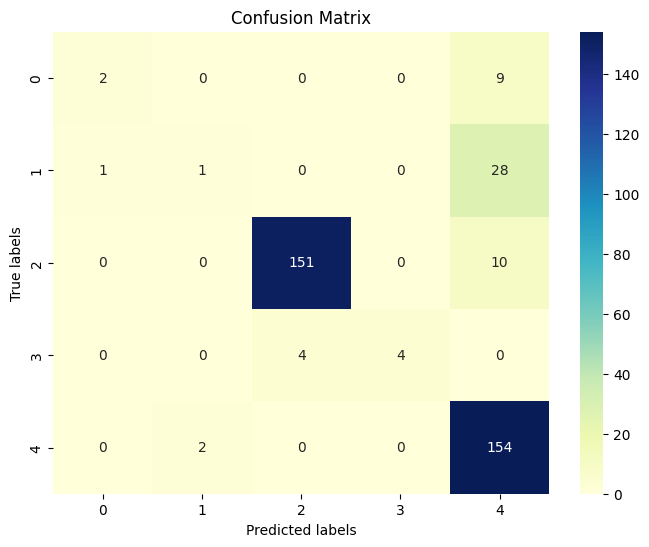

In [21]:
cm = confusion_matrix(y_test, DT_pred_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm,cmap='YlGnBu',fmt='d',annot=True,)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [22]:
report = classification_report(y_test, DT_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.33      0.03      0.06        30
           2       0.97      0.94      0.96       161
           3       1.00      0.50      0.67         8
           4       0.77      0.99      0.86       156

    accuracy                           0.85       366
   macro avg       0.75      0.53      0.57       366
weighted avg       0.82      0.85      0.82       366



In [23]:
import joblib

In [24]:
joblib.dump(model_DT, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [25]:
loaded_model = joblib.load('decision_tree_model.pkl')
print(loaded_model.score(X_test, y_test))

0.8524590163934426


In [ ]:
#var: precipitation(lượng mưa), wind(gió), month(tháng), temp_avg(nhiet do)
loaded_model = joblib.load('decision_tree_model.pkl')

X_new = [[0, 2, 1, 5.0]] 
prediction = loaded_model.predict(X_new)

print("Dự đoán:", prediction)

Dự đoán: [4]


In [ ]:
mapping_data = {
    "luong mua it": 0,
    "luong mua nhieu": 40,
    "luong mua binh thuong": 10,
    "gio nhe": 2,
    "gio manh": 5,
    "gio binh thuong": 3.2,
    "nhiet do thap": 7,
    "nhiet do cap": 30,
    "nhiet do binh thuong": 12,
}

weather_mapping = {
  0: "Trời mưa phùn",
  1: "Trời sương mù",
  2: "Trời mưa",
  3: "Trời tuyết",
  4: "Trời nắng"
}

req_json = {
  "responseId": "22664a24-f57d-46ca-b4a7-b2ef9035af0f-860a7d9f",
  "queryResult": {
    "queryText": "gió thổi 7 km/h, nhiệt độ thấp, độ ẩm cao và vào tháng 5",
    "parameters": {
      "gio": "",
      "nhiet-do": "",
      "unit-speed": {
        "unit": "km h",
        "amount": 7
      },
      "percentage": "",
      "date-time": {
        "endDate": "2025-05-31T23:59:59+07:00",
        "startDate": "2025-05-01T00:00:00+07:00"
      },
      "do-am": "35%",
      "temperature": { "amount": 37, "unit": "C" }
    },
    "allRequiredParamsPresent": True,
    "fulfillmentText": "bạn muống dự đoán tiếp nữa không?",
    "fulfillmentMessages": [
      {
        "text": {
          "text": [
            "bạn muống dự đoán tiếp nữa không?"
          ]
        }
      }
    ],
    "outputContexts": [
      {
        "name": "projects/chatbot-vags/agent/sessions/05064e6f-9e17-0c0a-92d0-5bc808c6452c/contexts/daonthitit-followup",
        "lifespanCount": 2,
        "parameters": {
          "date-time": {
            "endDate": "2025-05-31T23:59:59+07:00",
            "startDate": "2025-05-01T00:00:00+07:00"
          },
          "temperature": "",
          "duration": "",
          "gio.original": "",
          "temperature.original": "",
          "do-am": "am nhieu",
          "percentage.original": "",
          "do-am.original": "ẩm cao",
          "percentage": "",
          "date-time.original": "tháng 5",
          "unit-speed": {
            "amount": 7,
            "unit": "km h"
          },
          "duration.original": "",
          "unit-speed.original": "7 km/h",
          "gio": "",
          "nhiet-do.original": "nhiệt độ thấp",
          "nhiet-do": "nhiet do thap"
        }
      }
    ],
    "intent": {
      "name": "projects/chatbot-vags/agent/intents/d75a501f-f8d6-47c1-9826-efa6e83076d0",
      "displayName": "Dựa đoán thời tiết"
    },
    "intentDetectionConfidence": 1,
    "diagnosticInfo": {
      "webhook_latency_ms": 4893
    },
    "languageCode": "vi"
  },
  "webhookStatus": {
    "code": 4,
    "message": "Webhook call failed. Error: DEADLINE_EXCEEDED, State: URL_TIMEOUT, Reason: TIMEOUT_WEB."
  }
}

In [ ]:
parameters = req_json.get("queryResult", {}).get("parameters", {})
filtered_params = {k: v for k, v in parameters.items() if v != ''}
tempera = [v for v in [filtered_params.get("nhiet-do"), filtered_params.get("temperature")] if v]
precipitation = [v for v in [filtered_params.get("do-am"), filtered_params.get("unit-length")] if v]
wind = [v for v in [filtered_params.get("gio"), filtered_params.get("unit-speed")] if v]
month = [v for v in [filtered_params.get("date-time")]]
process = [[]]
if len(tempera) == 0 or len(precipitation) == 0 or len(wind) == 0:
    print("Not enough parameter")


if isinstance(precipitation[0], dict):
    amount = precipitation[0].get("amount")
    unit = precipitation[0].get("unit")
    if unit == "cm":
        amount *= 10
    elif unit == "m":
        amount *= 1000
    elif unit == "inch":
        amount *= 25.4
    process[0].append(amount)
else:
    process[0].append(mapping_data.get(precipitation[0]))


if isinstance(wind[0], dict):
    amount = wind[0].get("amount")
    unit = wind[0].get("unit")
    if unit == "km h":
        amount = amount / 3.6
    process[0].append(amount)
else:
    process[0].append(mapping_data.get(wind[0]))

if month:
    end_date = month[0].get("endDate")
    if end_date:
        month_num = end_date.split('-')[1]
        process[0].append(int(month_num))

if isinstance(tempera[0], dict):
    amount = tempera[0].get("amount")
    unit = tempera[0].get("unit")
    if unit == "K":
        amount = amount - 273.15
    process[0].append(amount)
else:
    process[0].append(mapping_data.get(tempera[0]))

prediction = loaded_model.predict(process)
print(f'Process: {weather_mapping[prediction[0]]}')

Process: Trời mưa
